In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

Epoch 1/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0698 - val_loss: 0.0312
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0261 - val_loss: 0.0224
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0194 - val_loss: 0.0161
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0135 - val_loss: 0.0119
Epoch 6/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 9/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0112 - val_loss: 0.0137
Epoch 10/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0106 - val_lo

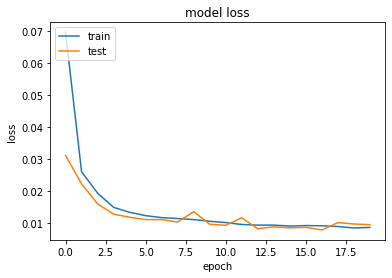

In [3]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(10)
])

model.compile(optimizer="adam", loss="mse")

history = model.fit(X_train, y_train, epochs=20, validation_data=
                    (X_valid, y_valid))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

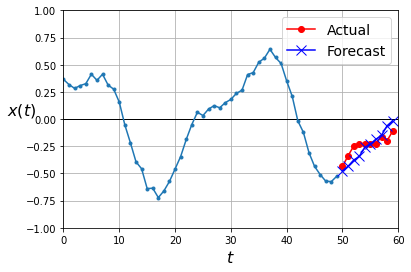

In [6]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()